### Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



### Data Dictionary
Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

#### Variable :	Description

**Loan_ID**	: Unique Loan ID

**Gender**	: Male/ Female

**Married**	Applicant married : (Y/N)

**Dependents**	: Number of dependents

**Education**	: Applicant Education (Graduate/ Under Graduate)

**Self_Employed**	Self employed :  (Y/N)

**ApplicantIncome**	: Applicant income

**CoapplicantIncome**	: Coapplicant income

**LoanAmount**	: Loan amount in thousands

**Loan_Amount_Term**	: Term of loan in months

**Credit_History**	: credit history meets guidelines

**Property_Area**	: Urban/ Semi Urban/ Rural

**Loan_Status**	(Target) : Loan approved (Y/N)


### Test file: CSV containing the customer information for whom loan eligibility is to be predicted

**Variable : 	Description

**Loan_ID**	: Unique Loan ID

**Gender**	: Male/ Female

**Married	Applicant** : married (Y/N)

**Dependents**	: Number of dependents

**Education**	: Applicant Education (Graduate/ Under Graduate)

**Self_Employed**	: Self employed (Y/N)

**ApplicantIncome**	: Applicant income

**CoapplicantIncome**	: Coapplicant income

**LoanAmount**	: Loan amount in thousands

**Loan_Amount_Term**	: Term of loan in months

**Credit_History**	: credit history meets guidelines

**Property_Area**	: Urban/ Semi Urban/ Rural

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# pip install imblearn

In [2]:
test = pd.read_csv('test_lAUu6dG.csv')
train = pd.read_csv('train_ctrUa4K.csv')

df = pd.concat([test, train])


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
print("The dataset has {} credit records".format(len(df)))

The dataset has 981 credit records


### <u>Missing values and Duplicate values Treatment

In [5]:
# Finding how many missing values are there for each column
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [6]:
def sep(df1):
    num_var = list(df.select_dtypes(exclude = 'object').columns.values)
    cat_var = list(df.select_dtypes(include = 'object').columns.values)
    
    print("The num features are : ", num_var)
    print()
    print("The ctg features are : ", cat_var)
    
sep(df)

The num features are :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

The ctg features are :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,981,981,LP002473,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,957,2,Male,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,978,2,Yes,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,956,4,0,545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,981,2,Graduate,763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,926,2,No,807,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,981,NaN,NaN,NaN,5179.8,5695.1,0,2875,3800,5516,81000
CoapplicantIncome,981,NaN,NaN,NaN,1601.92,2718.77,0,0,1110,2365,41667
LoanAmount,954,NaN,NaN,NaN,142.512,77.4217,9,100,126,162,700
Loan_Amount_Term,961,NaN,NaN,NaN,342.202,65.1006,6,360,360,360,480


In [8]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == 'float' else x.fillna(x.value_counts().index[0]))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.00000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.00000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.00000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.83592,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.00000,Urban,Y


In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## <u>Defining the problem statement:
#### Create a Predictive model which can tell weather to approve a loan application or not?
#### Target Variable: Loan Status <br>
<i><b> Loan Status - Yes ; means the loan was a good decision.<br> Loan Status - No  ; means the loan was a bad decision.<i><b>

## Determining the type of Machine Learning
Based on the problem statement we can understand that we need to create a supervised ML classification model, as the target variable is categorical.

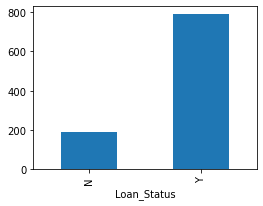

In [10]:
# Checking the distribution of target varibale.
GroupedData=df.groupby('Loan_Status').size()
GroupedData.plot(kind='bar', figsize=(4,3))
plt.show()

##### Inference:
The data is imbalanced. We have lesser number of observations for 'Rejected Loan'. There seems to be a need of Sampling.

### <u>Basic Data Exploration

In [11]:
df.nunique()

Loan_ID              981
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      752
CoapplicantIncome    437
LoanAmount           233
Loan_Amount_Term      13
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

### <u>Plotting The Graph For The Attributes: <br>
Categorical variables: Bar plot <br>
Continuous variables: Histogram

#### Categorical Variable

In [12]:
def PlotBarCharts(inpData, colsToPlot):
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

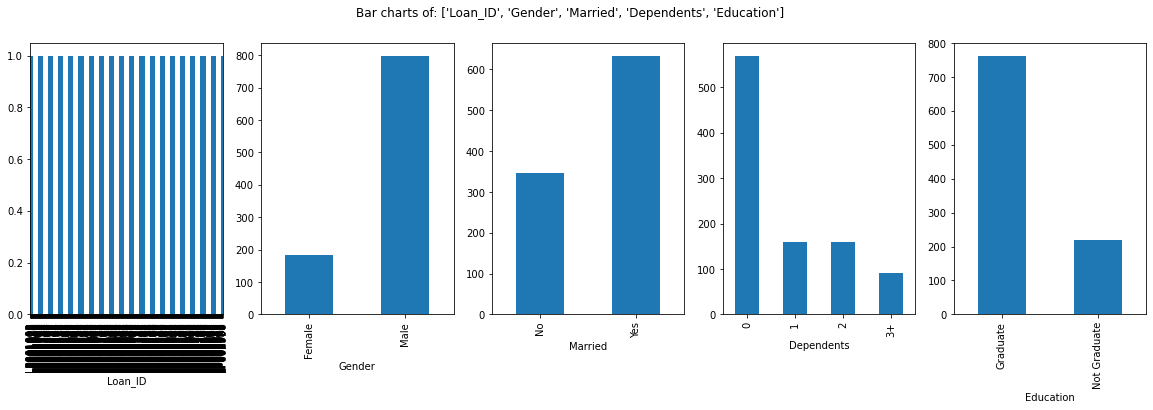

In [13]:
PlotBarCharts(inpData=df, 
              colsToPlot=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education'])

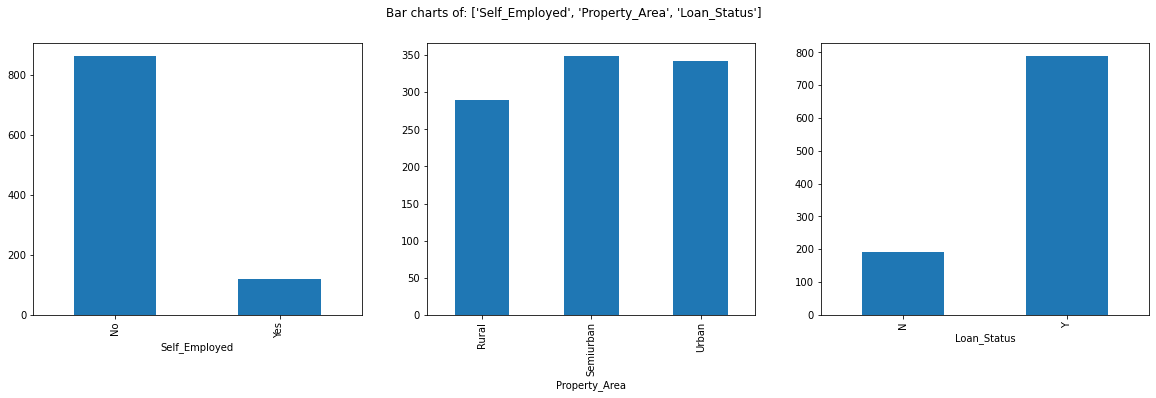

In [14]:
PlotBarCharts(inpData=df, 
              colsToPlot=['Self_Employed', 'Property_Area', 'Loan_Status'])

### Inference: Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
The ideal bar chart looks like the chart of "Property_Area" column where each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution like "dependents" where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

In this data, all the categorical columns except "Property_Area" have non-satisfactory distribution for machine learning.

### Continuous Variable

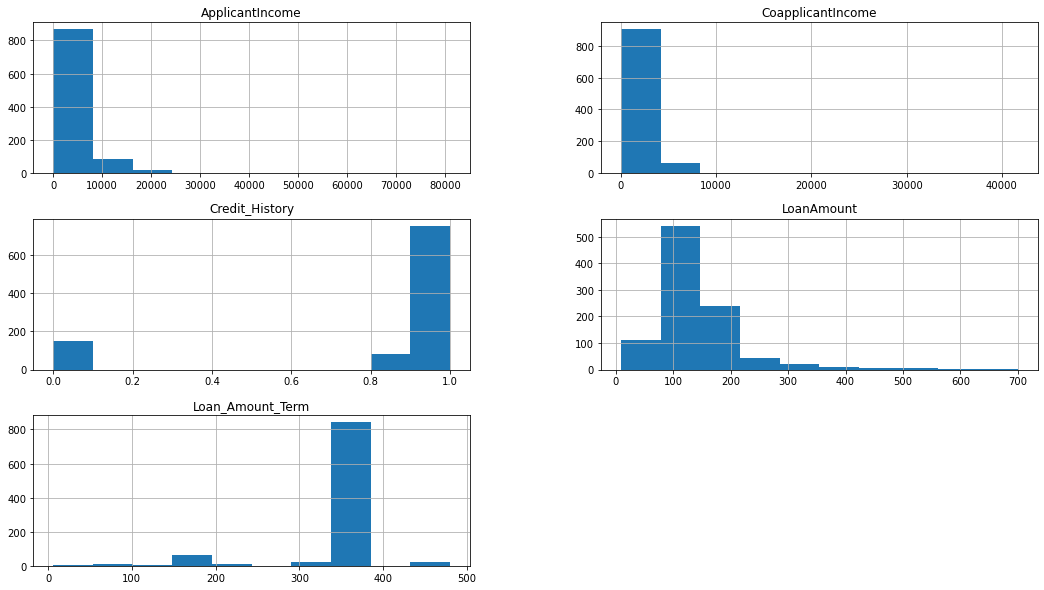

In [15]:
df.hist(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], figsize=(18,10))
plt.show()

### <u>Correlation and Heatmap

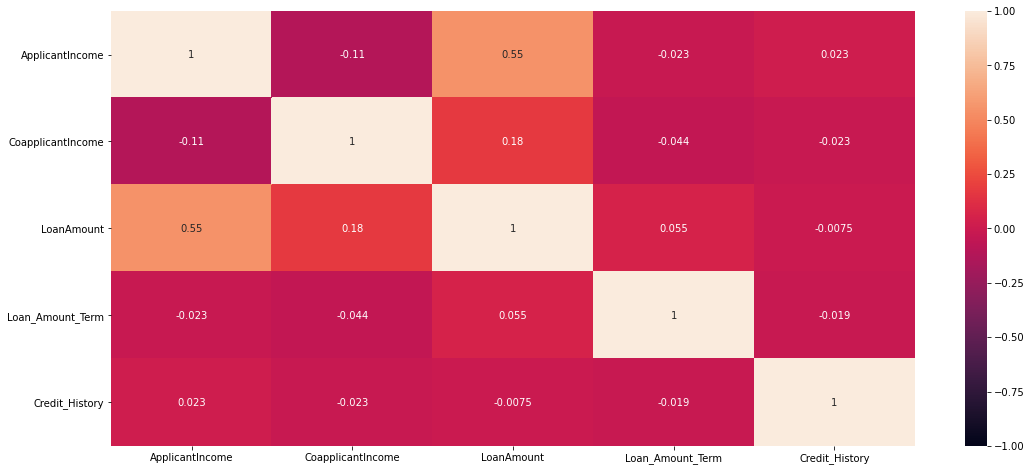

In [16]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

##### Inference

Loan_Amount and Applicant_income are the parameters having highest positive correlation.

### <u>Outlier Treatment

In [17]:
num_var = list(df.select_dtypes(exclude = 'object').columns.values)
print(num_var)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [18]:
skew_ApplicantIncome = df['ApplicantIncome'].skew()
skew_CoapplicantIncome = df['CoapplicantIncome'].skew()
skew_LoanAmount = df['LoanAmount'].skew()
skew_Loan_Amount_Term = df['Loan_Amount_Term'].skew()
skew_Credit_History = df['Credit_History'].skew()
print('Skewness: ','\n\nApplicantIncome: ',skew_ApplicantIncome,'\nCoapplicantIncome: ', skew_CoapplicantIncome,'\nLoanAmount: ',skew_LoanAmount,'Skewness: ','\nLoan_Amount_Term: ',skew_Loan_Amount_Term,'\nCredit_History: ',skew_Credit_History)


Skewness:  

ApplicantIncome:  7.0869611535945065 
CoapplicantIncome:  6.8441085814802705 
LoanAmount:  2.752054617168129 Skewness:  
Loan_Amount_Term:  -2.502958777682449 
Credit_History:  -1.8947511450150638


#### Inference:
As we can see all the columns has Skewness more or less than 1 i.e. they are extremely skewd. Hence we do 'SQRT' Transformation on columns.

In [19]:
print('Skewness value of ApplicantIncome after SQRT transformation: ', np.sqrt(df['ApplicantIncome']).skew())
print('Skewness value of CoapplicantIncome after SQRT transformation: ', np.sqrt(df['CoapplicantIncome']).skew())
print('Skewness value of LoanAmount after SQRT transformation: ', np.sqrt(df['LoanAmount']).skew())
print('Skewness value of Loan_Amount_Term after SQRT transformation: ', np.sqrt(df['Loan_Amount_Term']).skew())
print('Skewness value of Credit_History after SQRT transformation: ', np.sqrt(df['Credit_History']).skew())


Skewness value of ApplicantIncome after SQRT transformation:  3.0431755079356386
Skewness value of CoapplicantIncome after SQRT transformation:  0.8586067507480066
Skewness value of LoanAmount after SQRT transformation:  1.2693726241712497
Skewness value of Loan_Amount_Term after SQRT transformation:  -3.4213020891417063
Skewness value of Credit_History after SQRT transformation:  -1.9369910289673609


Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - We will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

### Total Income Feature

In [20]:
df["TotalIncome"]=df["ApplicantIncome"]+df["CoapplicantIncome"]
df["TotalIncome"].head()

0    5720.0
1    4576.0
2    6800.0
3    4886.0
4    3276.0
Name: TotalIncome, dtype: float64

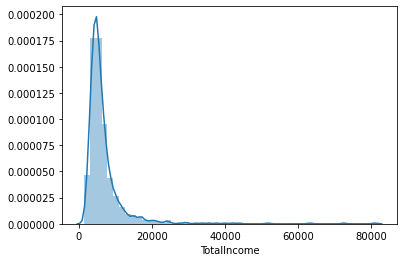

In [21]:
sns.distplot(df["TotalIncome"])
plt.show()

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

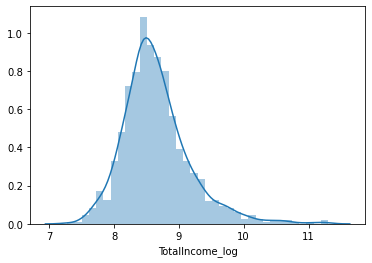

In [22]:
df["TotalIncome_log"]=np.log(df["TotalIncome"])
sns.distplot(df["TotalIncome_log"])
plt.show()

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

# EMI feature.

In [23]:
df["EMI"]=df["LoanAmount"]/df["Loan_Amount_Term"]
df[["EMI"]].head()

,EMI
0,0.305556
1,0.350000
2,0.577778
3,0.277778
4,0.216667


### Balance Income feature

In [24]:
df["Balance_Income"] = df["TotalIncome"]-df["EMI"]*1000 # To make the units equal we multiply with 1000
df[["Balance_Income"]].head()

,Balance_Income
0,5414.444444
1,4226.000000
2,6222.222222
3,4608.222222
4,3059.333333


Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [25]:
df=df.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,LP001015,Male,Yes,0,Graduate,No,1.00000,Urban,Y,5720.0,8.651724,0.305556,5414.444444
1,LP001022,Male,Yes,1,Graduate,No,1.00000,Urban,Y,4576.0,8.428581,0.350000,4226.000000
2,LP001031,Male,Yes,2,Graduate,No,1.00000,Urban,Y,6800.0,8.824678,0.577778,6222.222222
3,LP001035,Male,Yes,2,Graduate,No,0.83592,Urban,Y,4886.0,8.494129,0.277778,4608.222222
4,LP001051,Male,No,0,Not Graduate,No,1.00000,Urban,Y,3276.0,8.094378,0.216667,3059.333333


# Model Building :

Let’s prepare the data for feeding into the models.

Let's drop the "Loan_ID" variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [26]:
df=df.drop("Loan_ID",axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.00000,Urban,Y,5720.0,8.651724,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.00000,Urban,Y,4576.0,8.428581,0.350000,4226.000000
2,Male,Yes,2,Graduate,No,1.00000,Urban,Y,6800.0,8.824678,0.577778,6222.222222
3,Male,Yes,2,Graduate,No,0.83592,Urban,Y,4886.0,8.494129,0.277778,4608.222222
4,Male,No,0,Not Graduate,No,1.00000,Urban,Y,3276.0,8.094378,0.216667,3059.333333


In [27]:
X=df.drop("Loan_Status",1)
y=df[["Loan_Status"]]

In [28]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,TotalIncome,TotalIncome_log,EMI,Balance_Income
0,Male,Yes,0,Graduate,No,1.0,Urban,5720.0,8.651724,0.305556,5414.444444
1,Male,Yes,1,Graduate,No,1.0,Urban,4576.0,8.428581,0.350000,4226.000000


In [29]:
y.head(2)

,Loan_Status
0,Y
1,Y


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

Consider the “Gender” variable. It has two classes, Male and Female.

As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.

Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male

In [30]:
X = pd.get_dummies(X)
X.head(3)

,Credit_History,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5720.0,8.651724,0.305556,5414.444444,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,1.0,4576.0,8.428581,0.350000,4226.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,1.0,6800.0,8.824678,0.577778,6222.222222,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [31]:
df=pd.get_dummies(df)
df.head(3)

,Credit_History,TotalIncome,TotalIncome_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,1.0,5720.0,8.651724,0.305556,5414.444444,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
1,1.0,4576.0,8.428581,0.350000,4226.000000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,1.0,6800.0,8.824678,0.577778,6222.222222,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [32]:
###from sklearn.model_selection import train_test_split
###x_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
print('Shape of X before Sampling: ', X.shape, 'Shape of Y before Sampling: ', y.shape)

Shape of X before Sampling:  (981, 20) Shape of Y before Sampling:  (981, 1)


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#### Transforming imbalanced data into balanced data using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
s = SMOTE()
X_res,y_res = s.fit_resample(X,y)

In [36]:
print('Shape of X after Sampling: ', X_res.shape, 'Shape of Y after Sampling: ', y_res.shape)

Shape of X after Sampling:  (1578, 20) Shape of Y after Sampling:  (1578, 1)


### Applying different algorithms to find the model metrices and finalize the best model

### <u>Logistic Regression</u>

In [37]:
from sklearn.metrics import accuracy_score
logistic_model = LogisticRegression(random_state=1)
logistic_model.fit(X_res,y_res)

LogisticRegression(random_state=1)

In [38]:
pred_cv_logistic=logistic_model.predict(X_test)
score_logistic =accuracy_score(pred_cv_logistic,y_test)*100 
score_logistic

84.7457627118644

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly for our logistic regression model.

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(X_res,y_res)

DecisionTreeClassifier(random_state=1)

In [40]:
y_test_tree=tree_model.predict(X_test)
score_tree =accuracy_score(y_test_tree,y_test)*100 
print("The accuracy score of decision tree is : ",score_tree)

The accuracy score of decision tree is :  99.66101694915255


our predictions are almost 99.66% accurate, i.e. we have identified 99.66% of the loan status correctly for our Decision tree model.

In [41]:
tree_model.feature_importances_

array([0.38368556, 0.06384727, 0.05194285, 0.13137114, 0.08060184,
       0.00324309, 0.01365167, 0.02568993, 0.01127606, 0.01550388,
       0.00881089, 0.00981053, 0.00464363, 0.00863372, 0.00744291,
       0.01013503, 0.0034969 , 0.10082464, 0.03106125, 0.03432721])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(X_res,y_res)


In [ ]:
pred_cv_forest=forest_model.predict(X_test)
score_forest = accuracy_score(pred_cv_forest,y_test)*100
score_forest

our predictions are almost 94.91% accurate, i.e. we have identified 94.91% of the loan status correctly for our Random Forest model.

### Important Features from Decision Tree

In [44]:
tree_model.feature_importances_

array([0.38368556, 0.06384727, 0.05194285, 0.13137114, 0.08060184,
       0.00324309, 0.01365167, 0.02568993, 0.01127606, 0.01550388,
       0.00881089, 0.00981053, 0.00464363, 0.00863372, 0.00744291,
       0.01013503, 0.0034969 , 0.10082464, 0.03106125, 0.03432721])

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
dtf.fit(X_res, y_res)

from sklearn.model_selection import cross_val_score
cross_val_score(dtf, X_res, y_res, cv=3)

array([0.70342205, 0.82889734, 0.88593156])

In [46]:
y_pred_train_dtf = dtf.predict(X_res)
y_pred_test_dtf = dtf.predict(X_test)

print('Train Accuarcy: ', accuracy_score(y_res, y_pred_train_dtf))
print('Test Accuarcy: ', accuracy_score(y_test, y_pred_test_dtf))

Train Accuarcy:  0.9993662864385298
Test Accuarcy:  0.9966101694915255


In [47]:
cm_dtf = confusion_matrix(y_test, y_pred_test_dtf)
display(cm_dtf)


array([[ 58,   0],
       [  1, 236]], dtype=int64)

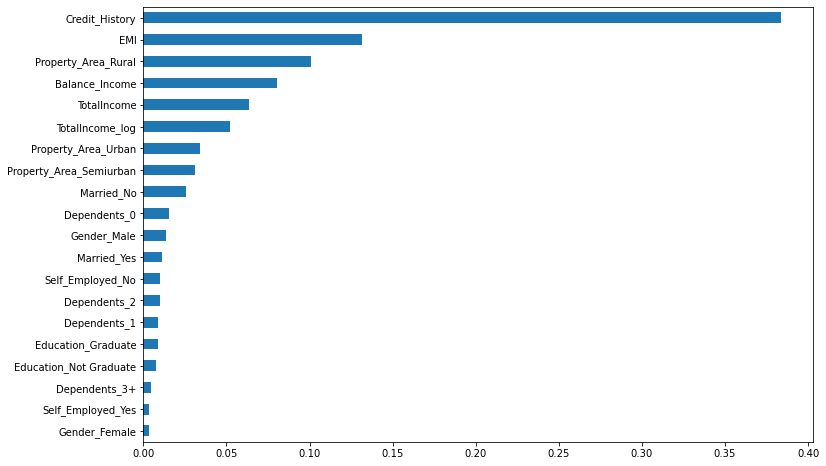

In [48]:
importances = pd.Series(tree_model.feature_importances_,index=X_res.columns)
order = importances.sort_values()
order.plot(kind='barh', figsize=(12,8))
plt.show()

We can find out that 'Credit_History','Property_Area_Rural' feature are most important. So, feature engineering helped us in predicting our target variable.